### פרויקט ניתוח בסיס נתונים המציג דירוגים עבור משחקי וידיאו
ראשית טענתי את הספריות פנימה ואת בסיס הנתונים מתוך קובץ אקסל

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import datetime as dt

In [32]:
df = pd.read_csv("IGN_data.csv",parse_dates=["released_date"],dayfirst=True)

In [33]:
df.head()

,Unnamed: 0,game,developers,publishers,franchises,features,released_date,platform,genres,score,score_text,esrb,esrb_info
0,0,Magic & Mayhem,['Mythos Games'],['Bethesda Softworks'],NaN,"['Memory Card', 'Online']",1999-05-15,['PC'],['Strategy'],7.3,good,Teen,['Animated Violence']
1,1,Fishing Master [2007],['Hudson Soft'],"['Konami', 'Hudson Soft']",NaN,"['Number Of Players', 'Local - VS # of Players']",2006-03-29,['Wii'],['Hunting'],5.5,mediocre,Everyone,['Mild Language']
2,2,Far Cry 2,"['Gameloft', 'Ubisoft Montreal']","['Ubisoft', 'Gameloft']",['Far Cry'],"['Memory Card', 'Vibration', 'DualShock', 'Mem...",2008-10-21,"['Luna', 'PC', 'Wireless', 'Xbox 360', 'PlaySt...",['Shooter'],8.9,great,Mature,"['Intense Violence', 'Drug Reference', 'Strong..."
3,3,Pro 18: World Tour Golf,['Psygnosis'],"['Psygnosis', 'Electro Source']",NaN,"['Number Of Players', 'Memory Card', 'Online']",1999-03-31,"['PC', 'PlayStation']",['Sports'],3.0,awful,Everyone,"['Suitable for Persons Ages Six and Older', 'N..."
4,4,Bust A Groove,['Metro Corporation (aka Metro Graphics)'],"['Sony Computer Entertainment', 'Enix', '989 S...",['Bust a Groove'],"['Number Of Players', 'Memory Card', 'Vibration']",1998-04-27,['PlayStation'],"['Action', 'Music']",9.0,amazing,Everyone,['Mild Language']


שמתי לב שכותרות העמודות כתובות באותיות קטנות ולכן הגדלתי אותן

In [34]:
df.rename(columns=str.capitalize,inplace=True)

בנוסף, שמתי לב שישנה עמודה מיותרת מצד שמאל של אינדקס - כאשר ספריית פנדאס מייצרת אוטומטית עמודת אינדקס -> לכן הורדתי את עמודה זו

In [35]:
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [36]:
# מחפש את "החשודים העיקריים" של ערכים ריקים - עמודות: מפתחים, פיצ'רים ודירוג תוכן לגילאים ריקות 
df[df['Esrb'].isna() & df['Developers'].isna() & df['Features'].isna()]

,Game,Developers,Publishers,Franchises,Features,Released_date,Platform,Genres,Score,Score_text,Esrb,Esrb_info
71,G.Skill RipJaws MX780 Mouse,NaN,['G.Skill'],NaN,NaN,NaT,['PC'],['Hardware'],8.0,great,NaN,NaN
104,Razer DeathAdder Chroma Mouse,NaN,['RAZER'],NaN,NaN,NaT,['PC'],['Hardware'],9.0,amazing,NaN,NaN
148,iPhone 12 Pro Max,NaN,['Apple'],['iPhone'],NaN,2020-11-13,['iPhone'],['Hardware'],7.0,good,NaN,NaN
694,Logitech G810 Orion Spectrum RGB Mechanical Ga...,NaN,['Logitech'],NaN,NaN,2016-02-04,['PC'],"['Hardware', 'Keyboard']",8.5,great,NaN,NaN
791,The Legend of Zelda: Breath of the Wild -- Exp...,NaN,['Nintendo'],['The Legend of Zelda'],NaN,2017-12-07,"['Wii U', 'Nintendo Switch']","['Adventure', 'DLC / Expansion']",7.8,good,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
10760,StarDrive,NaN,['Iceberg Interactive'],NaN,NaN,2013-04-26,['PC'],['Strategy'],4.5,bad,NaN,NaN
10943,Chaos Heroes Online,NaN,['Aeria Games & Entertainment'],NaN,NaN,2015-01-12,['PC'],"['Action', 'MOBA (Multiplayer Online Battle Ar...",5.6,mediocre,NaN,NaN
11132,GeForce GTX 1060 Graphics Card,NaN,['NVIDIA'],NaN,NaN,2016-05-27,['PC'],['Hardware'],8.9,great,NaN,NaN
11228,Sonic at the Olympic Winter Games [2010],NaN,['SEGA'],"['Sonic the Hedgehog', 'The Olympic Games']",NaN,2010-02-01,['iPhone'],['Sports'],5.0,mediocre,NaN,NaN


גיליתי ז'אנר חסר חשיבות למסד הנתונים - חומרה, וכעת אוריד את הערכים המכילים מילה זו בעמודת ז'אנרים

In [38]:
Hardware = df['Genres'].str.contains('Hardware', case=False, na=False)
df.drop(df[Hardware].index, inplace=True)

שמתי לב שישנם הרבה ערכים עם גרשיים וסוגריים מרובעים, אז יצרתי פונקציה שתסיר אותם מכל הדאטא-פריים

In [39]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].astype(str).str.strip("[]").str.replace("'", "")

לאחר מכן הצגתי מידע כללי אודות בסיס הנתונים

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11315 entries, 0 to 11361
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Game           11315 non-null  object        
 1   Developers     11315 non-null  object        
 2   Publishers     11315 non-null  object        
 3   Franchises     11315 non-null  object        
 4   Features       11315 non-null  object        
 5   Released_date  11274 non-null  datetime64[ns]
 6   Platform       11315 non-null  object        
 7   Genres         11315 non-null  object        
 8   Score          11273 non-null  float64       
 9   Score_text     11315 non-null  object        
 10  Esrb           11315 non-null  object        
 11  Esrb_info      11315 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 1.1+ MB


In [41]:
df.describe()

,Score
count,11273.000000
mean,6.964925
std,1.701703
min,0.000000
25%,6.000000
50%,7.300000
75%,8.200000
max,10.000000


In [42]:
df.shape

(11315, 12)

In [43]:
df.Genres.value_counts()

Action                           1684
Sports                            843
Shooter                           776
Strategy                          713
Racing                            662
                                 ... 
Lightgun Shooter, Shooter           1
Shooter, RPG, DLC / Expansion       1
Sampler, Sports                     1
Shooter, Hunting, Action            1
Sci-Fi, Shooter, First-Person       1
Name: Genres, Length: 614, dtype: int64

In [44]:
df["Genres"].nunique()

614

מכיוון שישנם הרבה ז'אנרים הנוצרים משילוב של ז'אנרים החלטתי לפצל אותם במטרה להגיע לרשימה יותר מצומצמת ומדויקת של ז'אנרים

In [45]:
# מפצל את הז'אנרים ע"י המפריד פסיק
df['genres_list'] = df['Genres'].str.split(', ')

# יוצר דאטאבייס חדש מתוך פונקציית אקספלוד של פאנדאס, פונקצייה זו מפצלת את הז'אנרים ובו-זמנית משמרת את השיוך של הז'אנרים המפוצלים עבור כל רשומת משחק
df_exploded = df.explode('genres_list')

df_exploded.head(20)

,Game,Developers,Publishers,Franchises,Features,Released_date,Platform,Genres,Score,Score_text,Esrb,Esrb_info,genres_list
0,Magic & Mayhem,Mythos Games,Bethesda Softworks,nan,"Memory Card, Online",1999-05-15,PC,Strategy,7.3,good,Teen,Animated Violence,Strategy
1,Fishing Master [2007,Hudson Soft,"Konami, Hudson Soft",nan,"Number Of Players, Local - VS # of Players",2006-03-29,Wii,Hunting,5.5,mediocre,Everyone,Mild Language,Hunting
2,Far Cry 2,"Gameloft, Ubisoft Montreal","Ubisoft, Gameloft",Far Cry,"Memory Card, Vibration, DualShock, Memory Bloc...",2008-10-21,"Luna, PC, Wireless, Xbox 360, PlayStation 3",Shooter,8.9,great,Mature,"Intense Violence, Drug Reference, Strong Langu...",Shooter
3,Pro 18: World Tour Golf,Psygnosis,"Psygnosis, Electro Source",nan,"Number Of Players, Memory Card, Online",1999-03-31,"PC, PlayStation",Sports,3.0,awful,Everyone,"Suitable for Persons Ages Six and Older, No De...",Sports
4,Bust A Groove,Metro Corporation (aka Metro Graphics),"Sony Computer Entertainment, Enix, 989 Studios",Bust a Groove,"Number Of Players, Memory Card, Vibration",1998-04-27,PlayStation,"Action, Music",9.0,amazing,Everyone,Mild Language,Action
4,Bust A Groove,Metro Corporation (aka Metro Graphics),"Sony Computer Entertainment, Enix, 989 Studios",Bust a Groove,"Number Of Players, Memory Card, Vibration",1998-04-27,PlayStation,"Action, Music",9.0,amazing,Everyone,Mild Language,Music
5,Star Trek: Away Team,Reflexive Entertainment,Activision,Star Trek,"Number Of Players, Online",2001-03-20,PC,Strategy,6.5,okay,Teen,Animated Violence,Strategy
6,Destroy All Humans! Big Willy Unleashed,Locomotive Games,THQ,nan,nan,2008-02-25,"Wii, PlayStation 2, PlayStation Portable",Adventure,5.8,mediocre,Teen,"Crude Humor, Sexual Themes, Violence, Mild Lan...",Adventure
7,Chivalry: Medieval Warfare,Torn Banner Studios,"Activision, Torn Banner Studios",Chivalry - Medieval Warfare,"Number Of Players, Online - VS Number Of Playe...",2012-10-16,"PlayStation 3, PlayStation 4, Xbox One, Xbox 3...",Adventure,7.9,good,Mature,"Blood and Gore, Intense Violence, Includes onl...",Adventure
8,New Super Mario Bros. Wii,Nintendo EAD Tokyo Software Development Depart...,Nintendo,Mario,"Dolby Pro Logic II, Offline Co-Op Multiplayer",2009-11-12,Wii,Platformer,8.9,great,Everyone,Comic Mischief,Platformer


In [46]:
# כבר אין צורך בעמודה זו בדאטא-פריים המקורי, ולכן אני מסיר אותה
df.drop(columns=['genres_list'])

# סופר את כמות הערכים הייחודיים של עמודת הז'אנרים
df_exploded['genres_list'].nunique()

119

In [47]:
# סופר את כמות הזיכיונות (פראנצ'ייז) היחודיים של משחקי וידיאו
df.Franchises.nunique()

1710

#### החלטתי לבדוק את הכמות הכוללת של משחקי וידיאו שיצאו עבור כל שנה במהלך השנים

In [49]:
# יוצר עמודה חדשה המכילה שנים בלבד
df["Year"] = df["Released_date"].dt.year

# מוריד את הערכים הריקים בעמודה החדשה של השנים בכדי לנקות את הדאטא
df.drop(df[df['Year'].isna()].index, inplace=True)

# משנה את עמודת השנים לדאטא-טייפ של אינט בכדי לראות את השנים בתור מספר שלם
df["Year"] = df["Year"].astype(int)

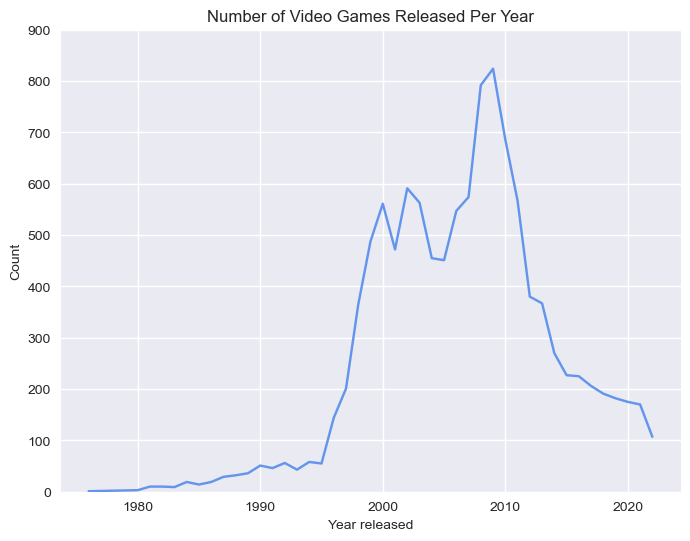

In [51]:
num_years = df["Year"].max() - df["Year"].min()+1 # השתמשתי בפלוס 1 בכדי לכלול בנוסף את השנה המקסימלית 2023
# יוצר גרף קווי, בוחר את הגודל ואת הסגנון
plt.figure(figsize=(8, 6),dpi=100)
plt.style.use('seaborn-v0_8')
plt.plot(df["Year"].value_counts().sort_index(), color="cornflowerblue")
# יוצר את הכותרת של הגרף והתוויות
plt.title("Number of Video Games Released Per Year")
plt.xlabel("Year released")
plt.ylabel("Count")
# רציתי שהגרף יציג את הערך המקסימלי התיאורתי ולכן השתמשתי בפונקציית plt.ylim
plt.ylim(0,900)
# מראה את הגרף ומציג משבצות בתור רקע
plt.grid(True)
plt.show()

#### החלטתי לבדוק כמה משחקים יצאו סך הכל עבור כל ז'אנר

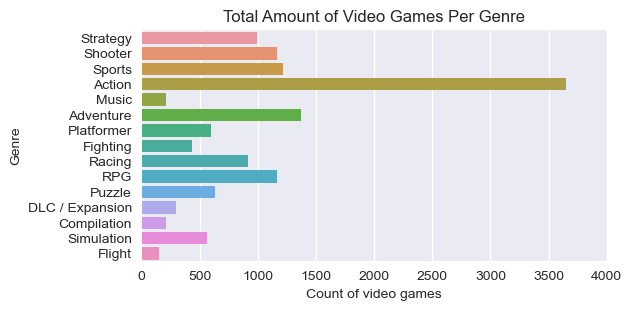

In [52]:
# סופר כמה משחקים יש בכל ז'אנר
genre_counts = df_exploded['genres_list'].value_counts()

# מסנן ז'אנרים עם מעל ל-100 משחקים
filtered_genres = genre_counts[genre_counts > 100].index

# מסנן את הדאטא-בייס שיכלול רק רשומות ז'אנרים מתוך רשימת הז'אנרים המסוננים שיצרתי קודם
filtered_df = df_exploded[df_exploded['genres_list'].isin(filtered_genres)]

# קובע את גודל הגרף
plt.figure(figsize=(6, 3))   

# יוצר את הגרף לפי הדאטא-בייס החדש המסונן
sb.countplot(data=filtered_df, y='genres_list')
plt.title("Total Amount of Video Games Per Genre")
# נותן תוויות עבור הצירים
plt.ylabel("Genre")
plt.xlabel("Count of video games")
# קובע את הערך המקסימלי התיאורתי עבור ציר האיקס
plt.xlim(0,4000)
# מציג את הגרף
plt.show()


In [53]:
# מקבץ לפי ז'אנרים, בוחן ע"י אגריגציה של ממוצע את עמודת הדירוג ושולף את הערכים הכי גבוהים אל תוך תצוגה של דאטאפריים
# כך אני מקבל בממוצע איזה ז'אנרים של משחקי וידיאו הצליחו הכי הרבה
df.groupby("Genres")["Score"].mean().nlargest().to_frame()

,Score
Genres,
"Action, Adventure, Western",9.7
"Action, Battle Royale, Free-to-Play, Crafting",9.6
"Simulation, Roguelike / Rogue-Lite",9.6
"Action, Adventure, Metroidvania, Open-World",9.5
"Action, Adventure, Platformer, Roguelike / Rogue-Lite",9.5


In [54]:
# בודק מהם המשחקים שבממוצע היה להם את הדירוג הנמוך ביותר
df.groupby("Genres")["Score"].mean().nsmallest().to_frame()

,Score
Genres,
"Sports, Rugby",1.75
"Shooter, Action, Lightgun Shooter",2.00
"Shooter, Action, Racing",2.00
"Shooter, Hunting, Action",2.00
"Casino, Puzzle",2.50


#### כעת אני ניגש לבחון הצלחה ע"י בחינת הדירוג הממוצע של ז'אנרים נבחרים מתוך בסיס הנתונים

In [ ]:
# מסנן את השנים שברצוני לבחון דרכם הצלחת ז'אנרים נבחרים
filtered_years_df = df[df['Year'].between(2010, 2023)]
genres_to_include = ["Action","Sports","Shooter","Strategy","RPG","Adventure","Racing","Platformer","Fighting","Puzzle"]
mask4 = filtered_years_df['Genres'].isin(genres_to_include)

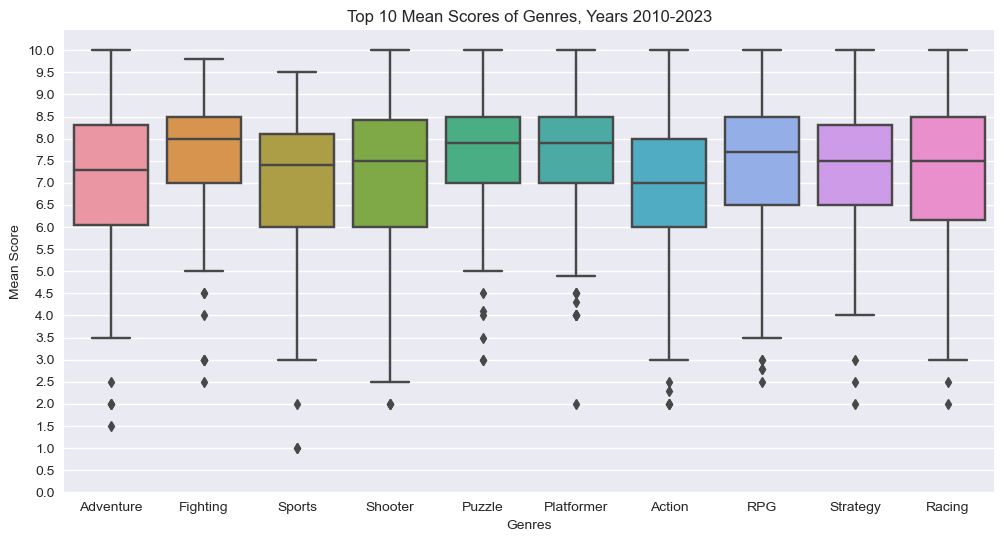

In [55]:
# בונה תרשים המציג דירוגים או ציונים ממוצעים עבור עשרה ז'אנרים נבחרים
# משתמש בספריות: Matplotlib.pyplot, seaborn(a.k.a sns/sb)
plt.figure(figsize=(12, 6))
sb.boxplot(x='Genres', y='Score', data=filtered_years_df[mask4])
plt.title("Top 10 Mean Scores of Genres, Years 2010-2023")
plt.xlabel('Genres')
plt.ylabel('Mean Score')
score_ticks = np.arange(0, 10.5, 0.5)
plt.yticks(score_ticks)
plt.show()

In [56]:
mask1 = df['Genres'].str.contains('Fighting', case=False, na=False)

In [57]:
df[mask1].query('Year >= 2013 & Score >=9').sort_values('Year',ascending=False).dropna()

,Game,Developers,Publishers,Franchises,Features,Released_date,Platform,Genres,Score,Score_text,Esrb,Esrb_info,genres_list,Year
8419,Rumbleverse,Iron Galaxy Studios,Epic Games,nan,Online Versus Multiplayer,2022-08-11,"PC, Xbox One, Xbox Series X|S, PlayStation 5, ...","Fighting, ""Beat Em Up"", Battle Royale, Free-to...",9.0,amazing,Teen,nan,"[Fighting, ""Beat Em Up"", Battle Royale, Free-t...",2022
3801,Guilty Gear Strive,ARC System Works,ARC System Works,Guilty Gear,"Offline Versus Multiplayer, Online Versus Mult...",2021-06-11,"Arcade, Xbox One, Xbox Series X|S, PC, PlaySta...",Fighting,9.0,amazing,Teen,"Violence, Blood, Mild Suggestive Themes, Langu...",[Fighting],2021
2651,Mortal Kombat 11,"NetherRealm Studios, Shiver Entertainment",Warner Bros. Interactive,Mortal Kombat,nan,2019-04-23,"PlayStation 5, Xbox Series X|S, Stadia, PC, Xb...",Fighting,9.0,amazing,Mature,"Strong Language, Blood and Gore, Intense Viole...",[Fighting],2019
5911,Street Fighter V: Arcade Edition,Capcom,Capcom,Street Fighter,"Offline Versus Multiplayer, Online Versus Mult...",2018-01-16,"PC, PlayStation 4",Fighting,9.0,amazing,Teen,"Mild Language, Suggestive Themes, Violence, On...",[Fighting],2018
10838,Super Smash Bros. Ultimate,"Bandai Namco Games, Sora Ltd..",Nintendo,Super Smash Bros,"Downloadable Content, Offline Versus Multiplay...",2018-12-07,Nintendo Switch,Fighting,9.4,amazing,Everyone 10+,"Cartoon Violence, Comic Mischief, Suggestive T...",[Fighting],2018
5512,Injustice 2,NetherRealm Studios,Warner Bros. Interactive,"DC Comics, Injustice - Gods Among Us","Offline Versus Multiplayer, Online Versus Mult...",2017-05-16,"PC, Xbox One, PlayStation 4",Fighting,9.0,amazing,Teen,"Alcohol Reference, Blood, Language, Suggestive...",[Fighting],2017
9298,Tekken 7,Bandai Namco Games,Bandai Namco Games,Tekken,nan,2015-02-18,"PC, Xbox One, PlayStation 4, Arcade",Fighting,9.5,amazing,Teen,"Crude Humor, Mild Blood, Mild Language, Sugges...",[Fighting],2015
373,Ultra Street Fighter IV,Capcom,"Sony Computer Entertainment, Capcom",Street Fighter,nan,2014-06-03,"PlayStation 4, PlayStation 3, PC, Xbox 360",Fighting,9.0,amazing,Teen,"Alcohol Reference, Mild Language, Suggestive T...",[Fighting],2014
3207,Super Smash Bros. for Wii U,Bandai Namco Games,Nintendo,Super Smash Bros,"Amiibo, Offline Versus Multiplayer, Online Ver...",2014-11-21,Wii U,Fighting,9.8,amazing,Everyone 10+,"Cartoon Violence, Comic Mischief, Mild Suggest...",[Fighting],2014
2456,Persona 4 Arena Ultimax,"Atlus, ARC System Works, P-Studio",Atlus,"Megami Tensei, Persona",Offline Versus Multiplayer,2013-11-28,"PlayStation 4, Nintendo Switch, PC, PlayStatio...",Fighting,9.1,amazing,Teen,"Mild Blood, Suggestive Themes, Violence, Langu...",[Fighting],2013


In [ ]:
fighting_scores_2013 = df[mask1].query('Score >= 9 & Year >= 2013').sort_values('Year',ascending=False).dropna()

#### לאחר הסינון הזה החלטתי לבדוק מה הנתח בשוק עבור מפתחים שיצרו משחקים בעלי דירוג 9 ומעלה (מעולה)
#### הערה: יש להריץ פעמיים את החלק הבא בקוד בכדי להציג את הגרף

In [60]:
# מקבץ את הדאטא לפי מפתחים ומחשב את הדירוג הכולל
developer_scores = fighting_scores_2013.groupby('Developers')['Score'].sum()
# מאחד מפתחים אל המפתח הראשי
fighting_scores_2013['Developers'] = fighting_scores_2013['Developers'].replace('Bandai Namco Games, Sora Ltd..', 'Bandai Namco Games')
fighting_scores_2013['Developers'] = fighting_scores_2013['Developers'].replace('Atlus, ARC System Works, P-Studio', 'ARC System Works')
fighting_scores_2013['Developers'] = fighting_scores_2013['Developers'].replace('NetherRealm Studios, Shiver Entertainment', 'NetherRealm Studios')

לאחר קיבוץ וניקוי הנתונים על הדאטא-פריים החדש, יצרתי את הגרף

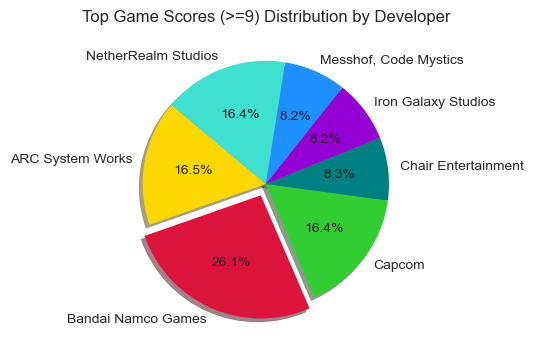

In [61]:
# כאן קבעתי צבעים לבחירתי אשר כל אחד מהצבעים יסמל מפתח אחר
custom_colors = ['Gold','Crimson','LimeGreen','Teal','DarkViolet','DodgerBlue','Turquoise']
# קובע את גודל הגרף
plt.figure(figsize=(4, 4)) 
# מגדיר שהחתיכה הגדולה ביותר בגרף תצא קצת החוצה בכדי להדגיש
explode = (0,0.1,0,0,0,0,0)
# יוצר את הגרך עצמו עם הצבעים שהגדרתי, עם פונקציית אקספלאוד, קובע הצגה באחוזים, מציג צללית וקובע את הזווית של גרף הפאי
plt.pie(developer_scores, labels=developer_scores.index, autopct='%1.1f%%', colors=custom_colors,explode=explode, shadow=True,startangle=140)
#נותן כותרת לגרף
plt.title('Top Game Scores (>=9) Distribution by Developer')

# מציג את הגרף
plt.show()

#### לבסוף יצרתי גרף היסטוגרמה המורכב מחמישה תתי-גרפים שונים, אשר כל אחד מהם מציג כמות של דירוג מסוים עבור פלטפורמה מסוימת

ראשית סיננתי חמישה פלטפורמות עיקריות שמצאתי בבסיס הנתונים: מחשב, פלייסטיישן, אקס-בוקס, משחקים על טלפונים ניידים (מורכב מאייפון ואנדרויד) ונינטנדו

In [62]:
PC_filter = df['Platform'].str.contains('PC', case=False, na=False)
PS_filter = df['Platform'].str.contains('PlayStation | PS', case=False, na=False)
Xbox_filter = df['Platform'].str.contains('Xbox', case=False, na=False)
Phone_filter = df['Platform'].str.contains('iPhone' or 'Android', case=False, na=False)
Nintendo_filter = df['Platform'].str.contains('Nintendo', case=False, na=False)

לאחר מכן קיבצתי כל פלטפורמה לפי דירוג

In [63]:
PC_games = df[PC_filter]["Score"]
PS_games = df[PS_filter]["Score"]
Xbox_games = df[Xbox_filter]["Score"]
Phone_games = df[Phone_filter]["Score"]
Nintendo_games = df[Nintendo_filter]["Score"]

לאחר מכן יצרתי מכל קיבוץ שכזה תת-גרף הסוכם כמות דירוגים שונים

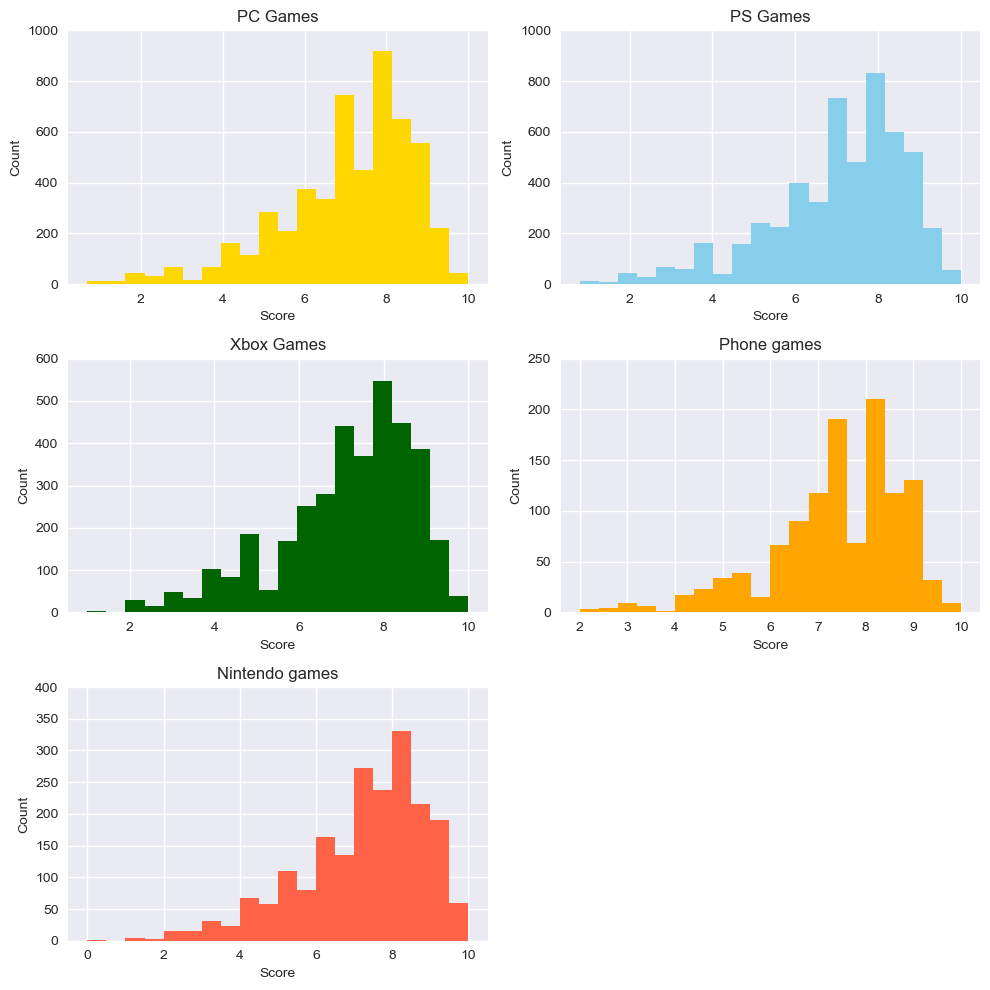

In [64]:
# כאן אני מגדיר את סך גודל הגרף
plt.figure(figsize=(10, 10)) 
# שורה ראשונה של הגרף
plt.subplot(3, 2, 1)
plt.hist(PC_games, label="PC Games", color="Gold", bins=20)
plt.title("PC Games")
plt.xlabel("Score")
plt.ylabel("Count")
plt.ylim(0, 1000)

plt.subplot(3, 2, 2)
plt.hist(PS_games, label="PS Games", color="Skyblue", bins=20)
plt.title("PS Games")
plt.xlabel("Score")
plt.ylabel("Count")
plt.ylim(0, 1000)

# שורה שנייה של הגרף
plt.subplot(3, 2, 3)
plt.hist(Xbox_games, label="Xbox Games", color="DarkGreen", bins=20)
plt.title("Xbox Games")
plt.xlabel("Score")
plt.ylabel("Count")
plt.ylim(0, 600)

plt.subplot(3, 2, 4)
plt.hist(Phone_games, label="Phone games", color="Orange", bins=20)
plt.title("Phone games")
plt.xlabel("Score")
plt.ylabel("Count")
plt.ylim(0, 250)

# שורה שלישית של הגרף
plt.subplot(3, 2, 5)
plt.hist(Nintendo_games, label="Nintendo games", color="Tomato", bins=20)
plt.title("Nintendo games")
plt.xlabel("Score")
plt.ylabel("Count")
plt.ylim(0, 400)
plt.tight_layout()
plt.show()